In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = np.array(range(1000+1))
n

array([   0,    1,    2, ...,  998,  999, 1000])

In [3]:
dt = 0.01

m = 1.0

v_n = 0.0
x_n = 0.0

In [4]:
_t_n = n * dt

_F_n = np.sin(_t_n)

_v_n = np.empty(_F_n.shape)
_x_n = np.empty(_F_n.shape)

v_n_1 = v_n
x_n_1 = x_n
for i, F_n in enumerate(_F_n):
    v_n_1 = v_n
    x_n_1 = x_n
    v_n = v_n_1 + F_n / m * dt
    x_n = x_n_1 + v_n * dt
    _v_n[i] = v_n
    _x_n[i] = x_n

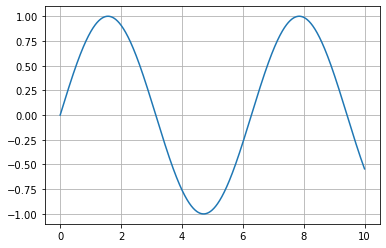

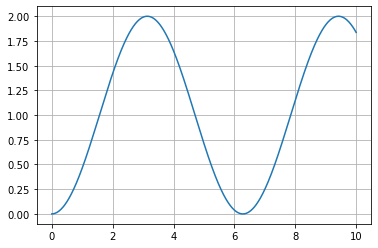

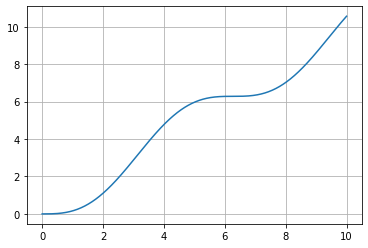

In [5]:
plt.plot(_t_n, _F_n)
plt.grid()
plt.show()

plt.plot(_t_n, _v_n)
plt.grid()
plt.show()

plt.plot(_t_n, _x_n)
plt.grid()
plt.show()

In [6]:
# (oben:) Lösung zu gestelltem Problem; mit Bedinung "anfangs in Ruhe"

In [7]:
dt = 0.01

m = 1.0

v_n = -1.0
x_n = 0.0

In [8]:
_t_n = n * dt

_F_n = np.sin(_t_n)

_v_n = np.empty(_F_n.shape)
_x_n = np.empty(_F_n.shape)

v_n_1 = v_n
x_n_1 = x_n
for i, F_n in enumerate(_F_n):
    v_n_1 = v_n
    x_n_1 = x_n
    v_n = v_n_1 + F_n / m * dt
    x_n = x_n_1 + v_n * dt
    _v_n[i] = v_n
    _x_n[i] = x_n

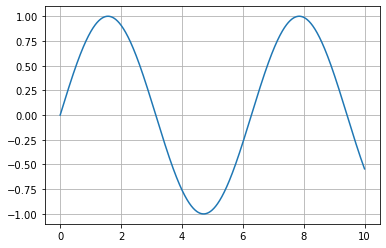

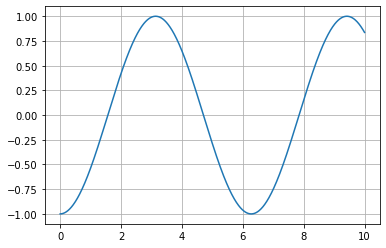

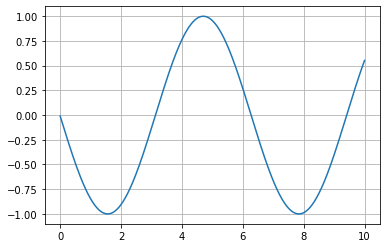

In [9]:
plt.plot(_t_n, _F_n)
plt.grid()
plt.show()

plt.plot(_t_n, _v_n)
plt.grid()
plt.show()

plt.plot(_t_n, _x_n)
plt.grid()
plt.show()

In [10]:
# (oben:) mit passenden Anfangsbedinguneg ist auch x harmonisch - klassischer Fall für harmonische Schwingung
# -> wenn Anfangsbed. nicht bekannt - insbesondere Geschw. v - dann ist es unmöglich aus IMU Daten die Position zu berechnen!

In [11]:
dt = 0.2

m = 1.0

v_n = -1.0
x_n = 0.0

In [12]:
_t_n = n * dt

_F_n = np.sin(_t_n)

_v_n = np.empty(_F_n.shape)
_x_n = np.empty(_F_n.shape)

v_n_1 = v_n
x_n_1 = x_n
for i, F_n in enumerate(_F_n):
    v_n_1 = v_n
    x_n_1 = x_n
    v_n = v_n_1 + F_n / m * dt
    x_n = x_n_1 + v_n * dt
    _v_n[i] = v_n
    _x_n[i] = x_n

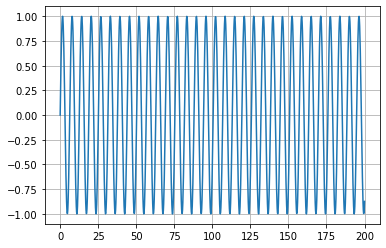

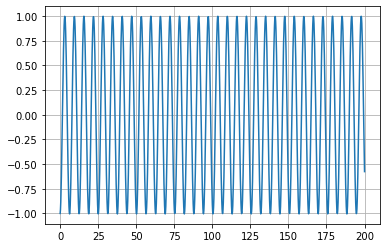

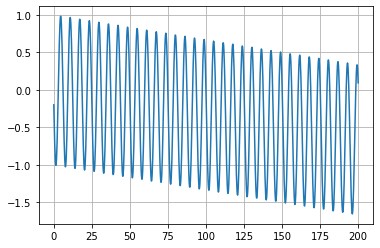

In [13]:
plt.plot(_t_n, _F_n)
plt.grid()
plt.show()

plt.plot(_t_n, _v_n)
plt.grid()
plt.show()

plt.plot(_t_n, _x_n)
plt.grid()
plt.show()

In [14]:
# (oben:) bei zu grossen Zeitschritten, bzw. über längere Zeit integriert summieren sich Fehler - Lösung driftet davon
# -> kleine Fehler summieren sich mit der Zeit auf - also selbst wenn Anfangsbed. bekannt ist es unmöglich aus IMU die Position zu berechnen!

In [15]:
dt = 0.01

m = 1.0

v_n = -1.0
x_n = 0.0

In [16]:
_t_n = n * dt

np.random.seed(4)
_F_n = np.sin(_t_n) + 0.2*(2*np.random.random(_t_n.shape)-1)

_v_n = np.empty(_F_n.shape)
_x_n = np.empty(_F_n.shape)

v_n_1 = v_n
x_n_1 = x_n
for i, F_n in enumerate(_F_n):
    v_n_1 = v_n
    x_n_1 = x_n
    v_n = v_n_1 + F_n / m * dt
    x_n = x_n_1 + v_n * dt
    _v_n[i] = v_n
    _x_n[i] = x_n

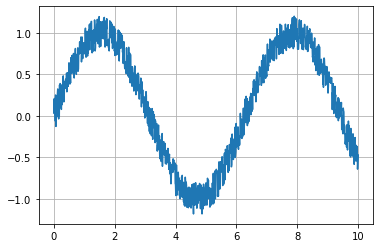

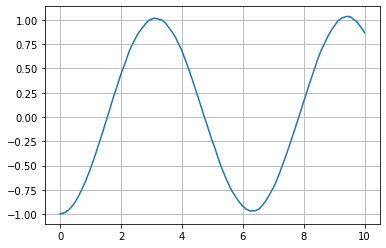

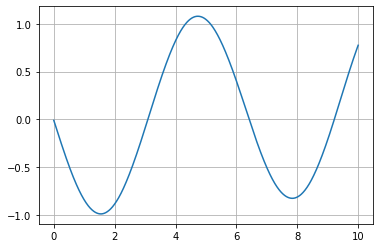

In [17]:
plt.plot(_t_n, _F_n)
plt.grid()
plt.show()

plt.plot(_t_n, _v_n)
plt.grid()
plt.show()

plt.plot(_t_n, _x_n)
plt.grid()
plt.show()

In [18]:
# (oben:) Rauschen auf den Messwerten, lässt die Lösung auch driften, schon nach 1 Schwingung ist das Minimum nicht mehr korrekt!

In [19]:
dt = 0.2

m = 1.0

v_n = -1.0
x_n = 0.0

In [20]:
# runge kutta (rk45)

#from scipy.integrate import solve_ivp
import scipy

#a = F(t)/m
#
#dv/dt = a = F(t)/m
#dr/dt = v
#
#dy / dt = f(t, y)
#dy / dt = (dv, dr) / dt = (a, v) = f(t, y)
#
#v = y[0]
#r = y[1]
#
#(dy/dt)[0] = dv/dt = a = F(t)/m
#(dy/dt)[1] = dr/dt = v = y[0]

_t_n = n * dt

f = lambda t, y: (np.sin(t)/m, y[0])

sol = scipy.integrate.solve_ivp(f, [np.min(_t_n), np.max(_t_n)], [v_n, x_n], t_eval=_t_n)  # RK45 - Runge Kutta 45

# - ZEIGEN DASS STABILER ALS Euler, FALL DRIFT ÜBER LANGE ZEIT (bei grossen Schritten), ODER FALL MIT NOISE...?

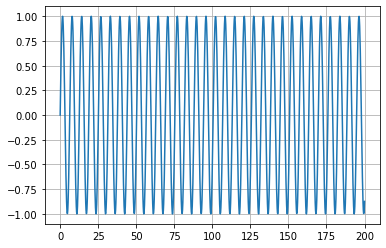

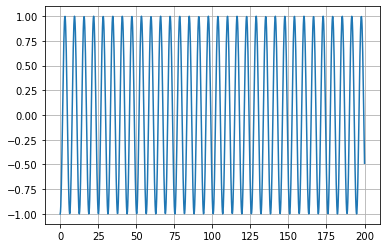

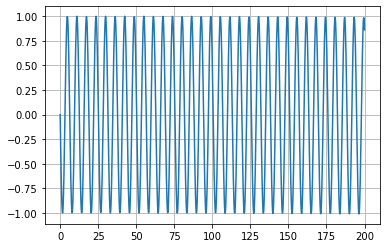

In [21]:
plt.plot(_t_n, f(_t_n, 0*_t_n)[0])
plt.grid()
plt.show()

plt.plot(sol.t, sol.y[0])
plt.grid()
plt.show()

plt.plot(sol.t, sol.y[1])
plt.grid()
plt.show()